<a href="https://colab.research.google.com/github/Rupal-Dhurde/AI-CODTECH-TASK2/blob/main/vish_ru_model_evalution_and_comparison_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

IMPORTING MODELS


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv("Housing.csv")


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [ ]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}


Linear Regression - MSE: 1754318687330.6638, R²: 0.6529
Decision Tree - MSE: 2642802637614.6787, R²: 0.4771
Random Forest - MSE: 1961585044320.3433, R²: 0.6119


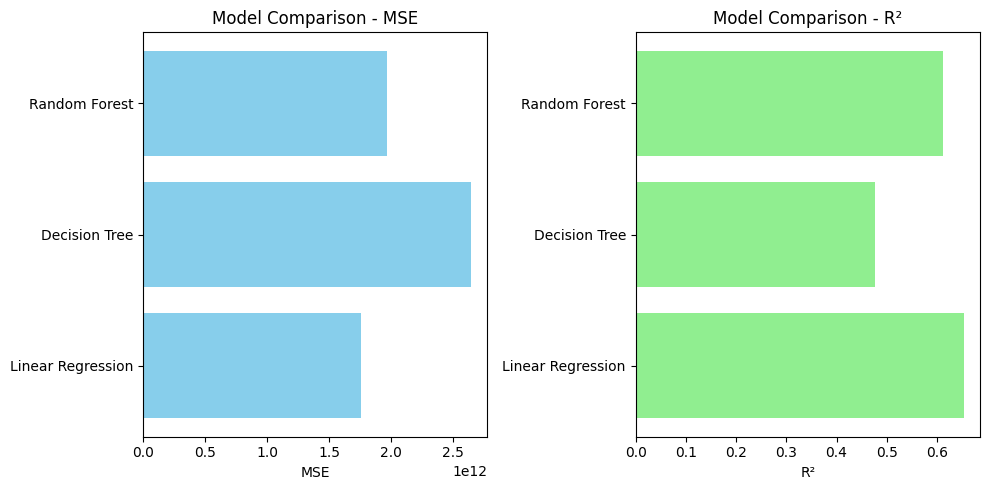

In [ ]:
# Display results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R²: {metrics['R²']:.4f}")

# Plotting the results
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R²'] for metrics in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel('MSE')
plt.title('Model Comparison - MSE')

plt.subplot(1, 2, 2)
plt.barh(model_names, r2_values, color='lightgreen')
plt.xlabel('R²')
plt.title('Model Comparison - R²')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Adding more models
models.update({
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
})

# Train and evaluate the updated set of models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}

# Display and visualize the updated results
# (This part of the code remains the same as the previous example)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results['Tuned Random Forest'] = {'MSE': mse, 'R²': r2}

print(f"Tuned Random Forest - MSE: {mse:.4f}, R²: {r2:.4f}")


Tuned Random Forest - MSE: 2086283679357.3230, R²: 0.5872


<ipython-input-25-f373588a55b0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=results_df, palette='Blues_d')
<ipython-input-25-f373588a55b0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=results_df, palette='Greens_d')


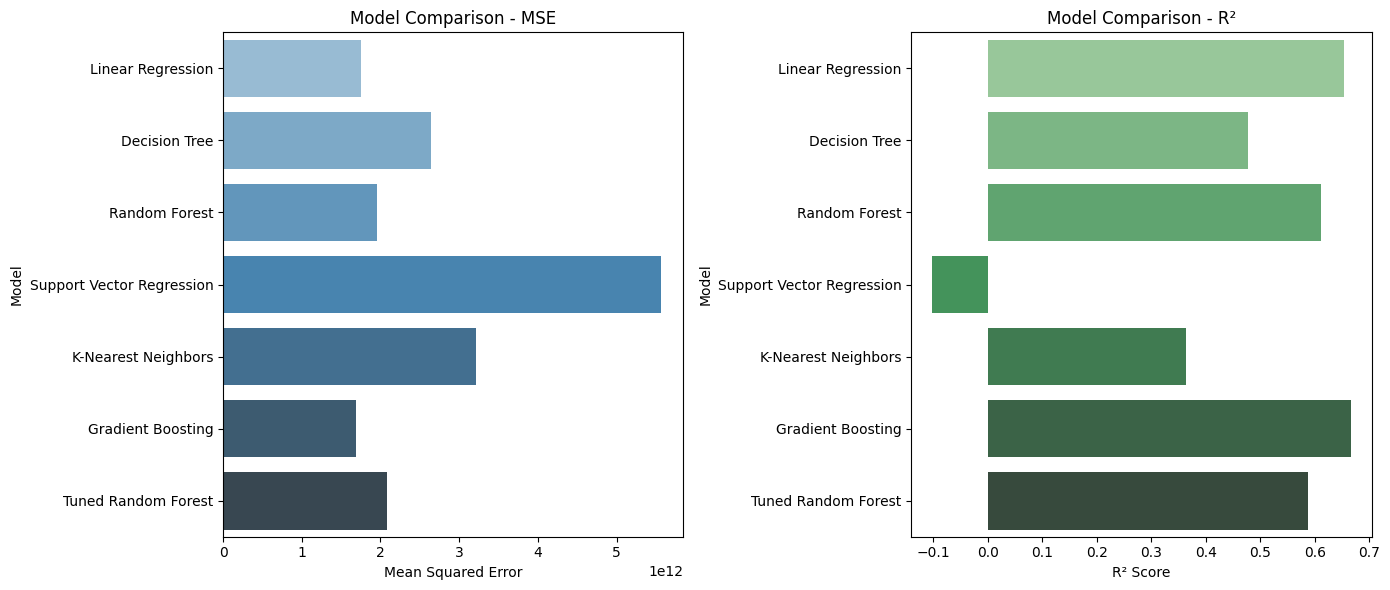

In [ ]:
import seaborn as sns

# Convert the results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results).T.reset_index()
results_df = results_df.rename(columns={'index': 'Model'})

# Plotting MSE and R² side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='MSE', y='Model', data=results_df, palette='Blues_d')
plt.title('Model Comparison - MSE')
plt.xlabel('Mean Squared Error')

plt.subplot(1, 2, 2)
sns.barplot(x='R²', y='Model', data=results_df, palette='Greens_d')
plt.title('Model Comparison - R²')
plt.xlabel('R² Score')

plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Make predictions with the loaded model
loaded_model.predict(X_test)


array([5133817.90795277, 7148800.06790187, 3664056.37199307,
       4549419.83023668, 4080886.18792375, 3626854.85701832,
       5081009.32933407, 5134847.06444384, 2799884.52319948,
       2974344.69623018, 9818511.54216783, 3219162.62802842,
       3180860.78800067, 3382528.83947253, 3776412.13302209,
       3878902.03677693, 3371778.77065148, 4885776.91020065,
       3924692.12696806, 4203919.33867882, 5199161.45324283,
       5923718.03031446, 3000930.5413533 , 3817572.35805814,
       4710994.67097204, 6537269.15438914, 3191338.22611865,
       4516317.17782194, 6290508.89120161, 3402621.59021274,
       5523684.00138951, 3115029.89839019, 6696065.95860208,
       4443414.00775858, 3137992.34116925, 6208516.12877074,
       4753152.7587093 , 3633400.74702671, 3244571.3252888 ,
       4257482.08487583, 4330119.46872361, 3028989.41981969,
       7200139.0935429 , 4217885.53133798, 4114155.18627241,
       4334870.76272264, 6844189.57112362, 4157565.15678822,
       3599422.40752338,

In [ ]:
from sklearn.metrics import mean_absolute_error

# Detailed report for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


Linear Regression - MSE: 1754318687330.6638, MAE: 970043.4039, R²: 0.6529
Decision Tree - MSE: 2642802637614.6787, MAE: 1195266.0550, R²: 0.4771
Random Forest - MSE: 1961585044320.3433, MAE: 1021546.0353, R²: 0.6119
Support Vector Regression - MSE: 5567932366409.7832, MAE: 1763890.2922, R²: -0.1016
K-Nearest Neighbors - MSE: 3213839804128.4404, MAE: 1296547.7064, R²: 0.3642
Gradient Boosting - MSE: 1688403924777.5098, MAE: 959748.9636, R²: 0.6660


In [ ]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report
import numpy as np

def evaluate_model(model, X_test, y_test, model_type='classification'):
    """
    Evaluates the accuracy of a model depending on the type of task.

    Parameters:
    - model: Trained model to be evaluated.
    - X_test: Features of the test set.
    - y_test: True labels/values of the test set.
    - model_type: Type of the model ('classification' or 'regression').

    Returns:
    - None. Prints out the evaluation metrics.
    """
    y_pred = model.predict(X_test)

    if model_type == 'classification':
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:\n")
        print(classification_report(y_test, y_pred))

    elif model_type == 'regression':
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"R² Score: {r2:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")

    else:
        print("Invalid model type. Please choose 'classification' or 'regression'.")




In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a classification model trained and data prepared:
trained_classifier = RandomForestClassifier(random_state=42)
trained_classifier.fit(X_train, y_train)

evaluate_model(trained_classifier, X_test, y_test, model_type='classification')


Accuracy: 0.0000

Classification Report:

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00       1.0
     1820000       0.00      0.00      0.00       1.0
     1855000       0.00      0.00      0.00       0.0
     1890000       0.00      0.00      0.00       2.0
     2100000       0.00      0.00      0.00       1.0
     2233000       0.00      0.00      0.00       1.0
     2275000       0.00      0.00      0.00       1.0
     2380000       0.00      0.00      0.00       1.0
     2450000       0.00      0.00      0.00       2.0
     2520000       0.00      0.00      0.00       1.0
     2653000       0.00      0.00      0.00       0.0
     2660000       0.00      0.00      0.00       4.0
     2730000       0.00      0.00      0.00       0.0
     2800000       0.00      0.00      0.00       1.0
     2870000       0.00      0.00      0.00       1.0
     2940000       0.00      0.00      0.00       2.0
     2961000       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a regression model trained and data prepared:
trained_regressor = RandomForestRegressor(random_state=42)
trained_regressor.fit(X_train, y_train)

evaluate_model(trained_regressor, X_test, y_test, model_type='regression')


R² Score: 0.6119
Mean Squared Error: 1961585044320.3433
